In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("./dataset.csv")

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
df.shape

(614, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [50]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [53]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [54]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [55]:
df.replace({'Loan_Status': {'N':0, 'Y':1}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\4179674291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status': {'N':0, 'Y':1}},inplace=True)


In [56]:
df.replace({'Gender': {'Female':0, 'Male':1}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\2362426478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'Female':0, 'Male':1}},inplace=True)


In [57]:
df.replace({'Education': {'Not Graduate':0, 'Graduate':1}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\2887179198.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Education': {'Not Graduate':0, 'Graduate':1}},inplace=True)


In [58]:
df.replace({'Self_Employed' : {'No' : 0, 'Yes' : 1}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\1345000819.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Self_Employed' : {'No' : 0, 'Yes' : 1}},inplace=True)


In [62]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [64]:
df.replace({'Property_Area' : {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\4194187721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Property_Area' : {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}},inplace=True)


In [66]:
df.replace({'Married' : {'No' : 0, 'Yes' : 1}},inplace=True)

C:\Users\Sardor\AppData\Local\Temp\ipykernel_3916\596559415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married' : {'No' : 0, 'Yes' : 1}},inplace=True)


In [70]:
df = df.replace(to_replace='3+', value=4)

In [59]:
df.drop('Loan_ID',axis=1,inplace=True)

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [74]:
df.corrwith(df['Loan_Status']).sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561678
Property_Area        0.137545
Married              0.089280
Education            0.085884
Gender               0.019857
Dependents          -0.000760
Self_Employed       -0.002303
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
dtype: float64

In [75]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
categorical_columns_with_nan=['Gender','Married','Dependents','Self_Employed']
numerical_columns_with_nan=['LoanAmount','Loan_Amount_Term','Credit_History']
for col in categorical_columns_with_nan:
    df[col]=df[col].fillna(df[col].mode()[0])
for col in numerical_columns_with_nan:
    df[col]=df[col].fillna(df[col].mean())

In [77]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

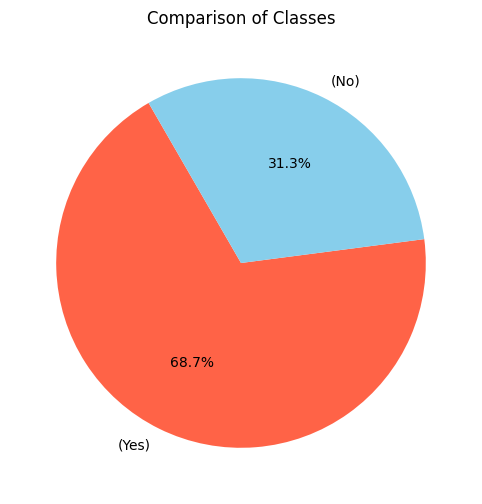

In [80]:
classes=df['Loan_Status'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(classes,labels=['(Yes)','(No)'],autopct='%1.1f%%',startangle=120,colors=['tomato','skyblue'])
plt.title('Comparison of Classes')
plt.show()

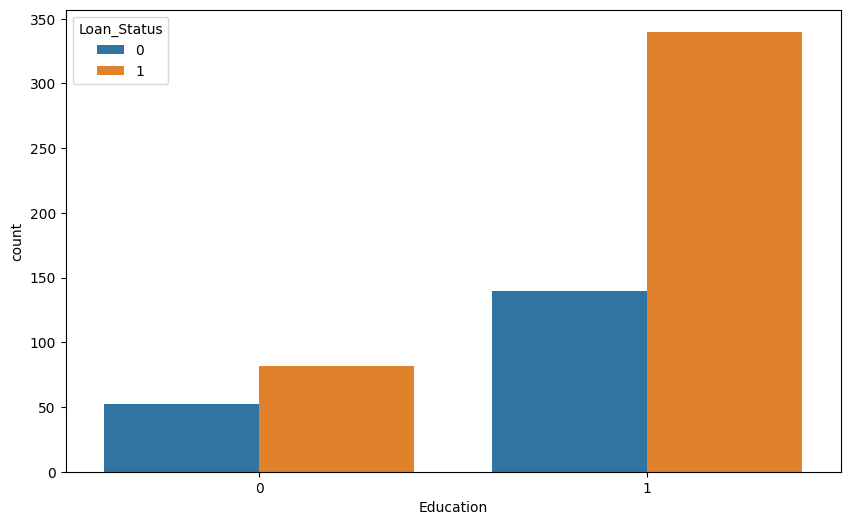

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x="Education", hue="Loan_Status", data=df)
plt.show()

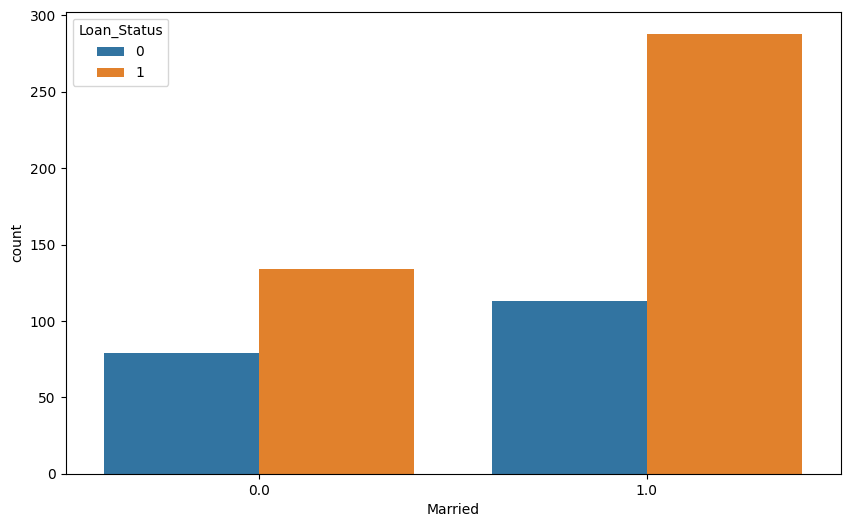

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x="Married", hue="Loan_Status", data=df)
plt.show()

In [94]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,1


In [97]:
df['Credit_History'].value_counts()

Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64

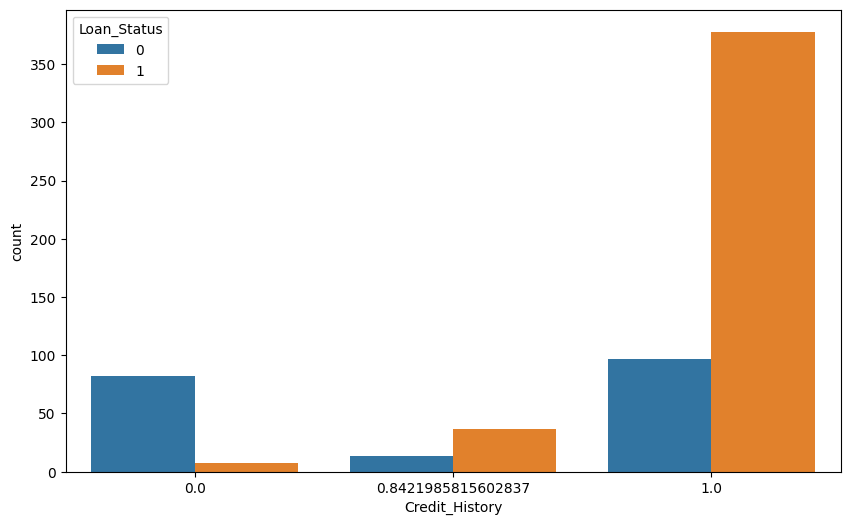

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
plt.show()

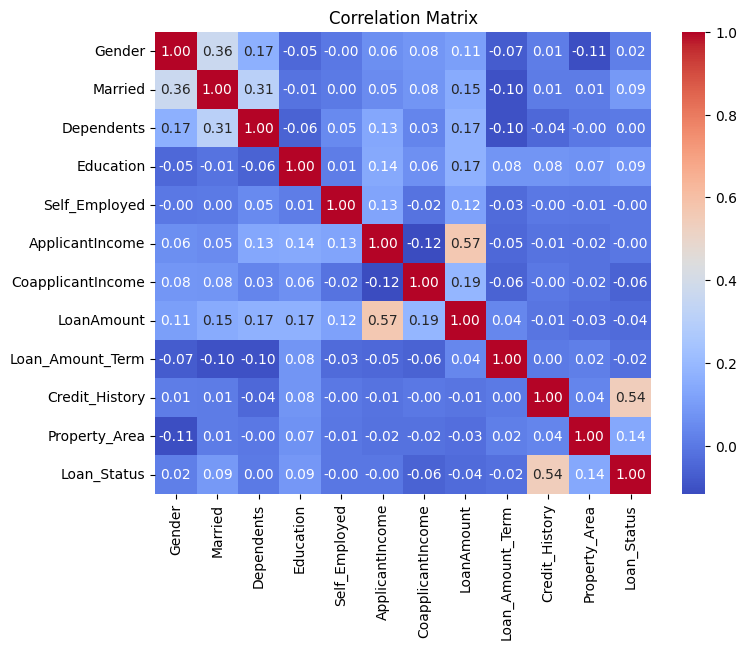

In [99]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [104]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,1


In [107]:
scaler = MinMaxScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].values)

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1,1
1,1.0,1.0,1,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,1.0,1.0,0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1,1
3,1.0,1.0,0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1,1
4,1.0,0.0,0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1,1


In [116]:
X = df.iloc[:,[i for i in range(11)]]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1
1,1.0,1.0,1,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1.0,1.0,0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1
3,1.0,1.0,0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1
4,1.0,0.0,0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1


In [117]:
y = df['Loan_Status']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### KNN Classification

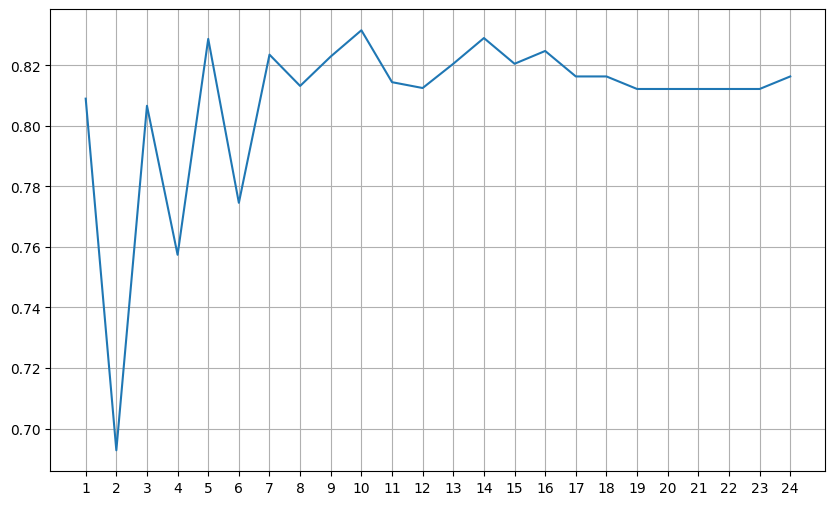

In [120]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [132]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [133]:
predict_knn = model_knn.predict(X_test)
predict_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [134]:
acsc = accuracy_score(y_test,predict_knn)
print(f"Accuracy:{acsc * 100 :.2f}")

Accuracy:73.98


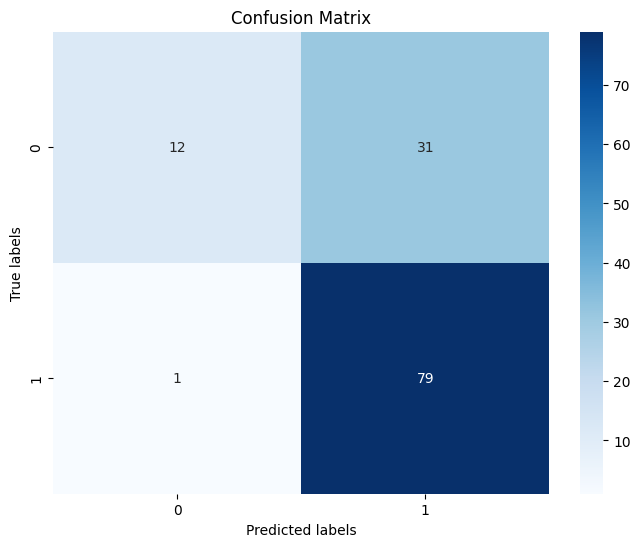

In [135]:
cm = confusion_matrix(y_test,predict_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [136]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
predict_RF = model_RF.predict(X_test)
predict_RF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [138]:
acsc = accuracy_score(y_test,predict_RF)
print(f"Accuracy:{acsc * 100 :.2f}")

Accuracy:75.61


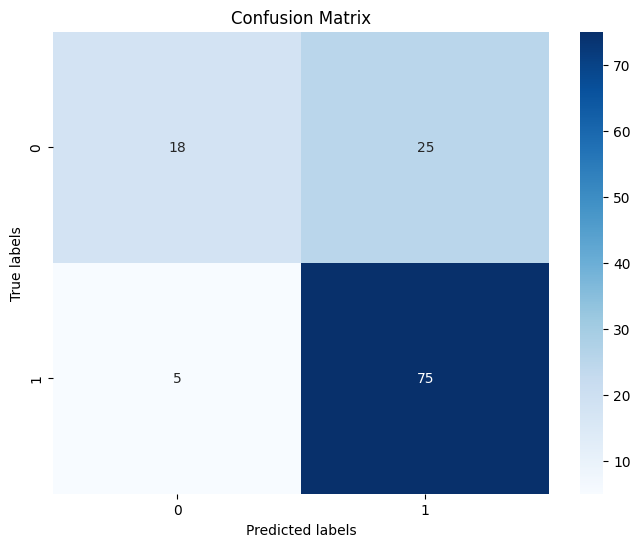

In [139]:
cm = confusion_matrix(y_test,predict_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [141]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
predict_DT = model_DT.predict(X_test)
predict_DT

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [144]:
acsc = accuracy_score(y_test,predict_DT)
print(f"Accuracy:{acsc * 100 :.2f}")

Accuracy:72.36


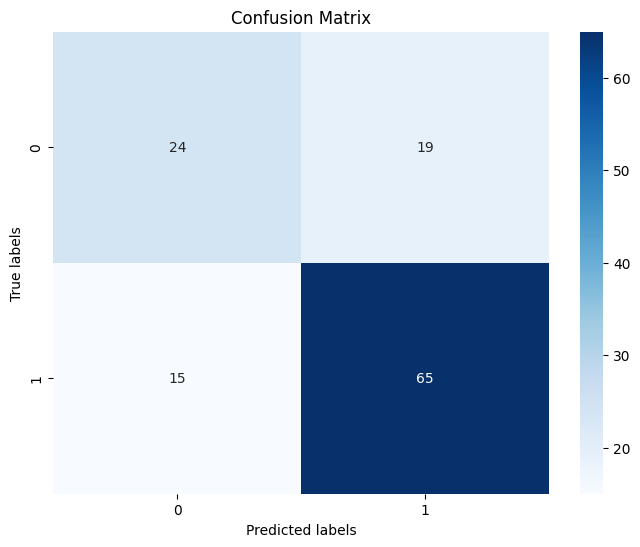

In [145]:
cm = confusion_matrix(y_test,predict_DT)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [146]:
model_LR = LogisticRegression()
model_LR.fit(X_test,y_test)

LogisticRegression()

In [147]:
predict_LR = model_LR.predict(X_test)
predict_LR

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [149]:
acsc = accuracy_score(y_test,predict_LR)
print(f"Accuracy:{acsc * 100 :.2f}")

Accuracy:79.67


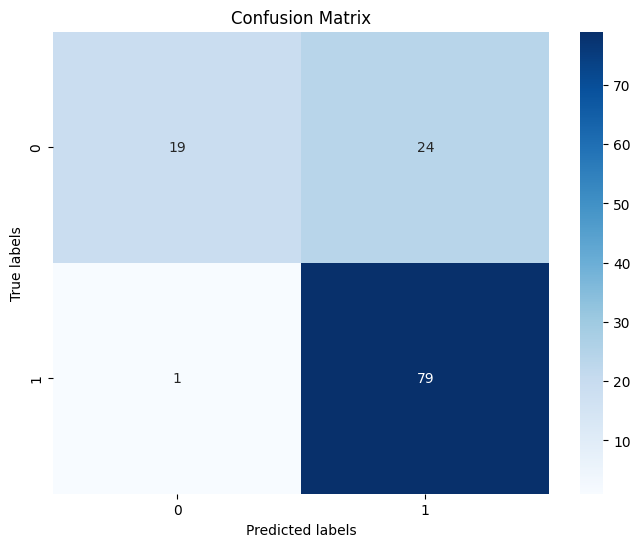

In [150]:
cm = confusion_matrix(y_test,predict_LR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [151]:
import pickle

filename = "LR_model.pkl"
with open(filename,'wb') as file:
    pickle.dump(model_LR,file)